# Adaboost  
AdaboostはAdaptive Boostingの略語.  代表的なboosting の手法の一つ．


input 

> トレーニングデータ $D = (X_{i}, y_{i})$，弱分類器 $L$ ，学習回数 $T$


アルゴリズム


1. 初期の重みを設定
2. 

ここでは, データ$D$としてirisデータを使い，弱分類器 $L$ は決定木(sklearnを使用)

In [3]:
from sklearn import datasets
import numpy as np
from sklearn.tree import DecisionTreeClassifier 

import matplotlib.pyplot as plt
%matplotlib inline


# load data 
iris = datasets.load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]
y[np.where(y==0)] = -1

# setting train&test data


In [4]:
iris.feature_names[:2]

['sepal length (cm)', 'sepal width (cm)']

0. 入力

In [5]:
# 学習データ
X = iris.data[:100,:2]
y = iris.target[:100]
y[np.where(y==0)] = -1

# 学習回数
T = 3 


1 . 初期の重みを設定 

In [6]:
W = np.ones(len(X)) / len(X)

In [2]:
def error(col, pred):
    n = len(col)
    collect = np.sum(np.array(col) ==np.array(pred)) 
    return (collect - n)/n

In [9]:
clf = DecisionTreeClassifier()
clf.fit(X, y, sample_weight = W)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
DecisionTreeClassifier?

In [8]:
# 必要なライブラリのインポート
from sklearn.tree import DecisionTreeRegressor
# 説明変数と目的変数を選択
X = df.loc[:, ['LSTAT']].values
y = df.loc[:, 'MEDV'].values
# モデル構築、木の深さは3に固定
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

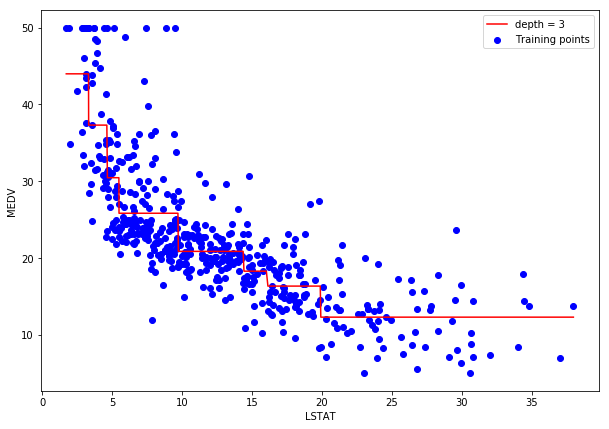

In [9]:
# 回帰直線を図示するのに変数を並び替え
sort_idx = X.flatten().argsort()
# matplotlibのインポートとおまじない
import matplotlib.pyplot as plt
%matplotlib inline 

# プロット
plt.figure(figsize = (10, 7))
plt.scatter(X[sort_idx], y[sort_idx], c = 'blue', label = 'Training points')
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color = 'red', label = 'depth = 3')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc = 'upper right')
plt.show()


参考
- [元の論文?](http://www.cis.upenn.edu/~mkearns/teaching/COLT/boostingexperiments.pdf) 
- https://towardsdatascience.com/boosting-algorithm-adaboost-b6737a9ee60c
- [これを元に書きました](http://rob.schapire.net/papers/explaining-adaboost.pdf)
- http://www.iip.ist.i.kyoto-u.ac.jp/member/keisuke/resources/11adaboost.pdf
- https://algorithm.joho.info/machine-learning/boost-adaboost/
- http://www.robots.ox.ac.uk/~az/lectures/cv/adaboost_matas.pdf
- [スライド](https://www.slideshare.net/Retrieva_jp/ss-80724064)

/Users/Yoshino/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Yoshino/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:77: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/Yoshino/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:78: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional ind

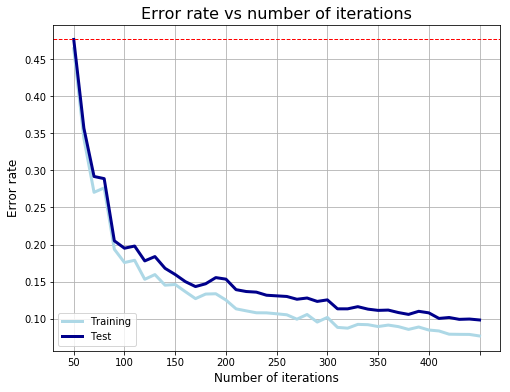

In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt

""" HELPER FUNCTION: GET ERROR RATE ========================================="""
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

""" HELPER FUNCTION: PRINT ERROR RATE ======================================="""
def print_error_rate(err):
    print ('Error rate: Training: %.4f - Test: %.4f' % err)

""" HELPER FUNCTION: GENERIC CLASSIFIER ====================================="""
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)
    
""" ADABOOST IMPLEMENTATION ================================================="""
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        # Equivalent with 1/-1 to update weights
        miss2 = [x if x==1 else -1 for x in miss]
        # Error
        err_m = np.dot(w,miss) / sum(w)
        # Alpha
        alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))
        # New weights
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train, 
                                          [x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test, 
                                         [x * alpha_m for x in pred_test_i])]
    
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test)

""" PLOT FUNCTION ==========================================================="""
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

""" MAIN SCRIPT ============================================================="""
if __name__ == '__main__':
    
    # Read data
    x, y = make_hastie_10_2()
    df = pd.DataFrame(x)
    df['Y'] = y

    # Split into training and test set
    train, test = train_test_split(df, test_size = 0.2)
    X_train, Y_train = train.ix[:,:-1], train.ix[:,-1]
    X_test, Y_test = test.ix[:,:-1], test.ix[:,-1]
    
    # Fit a simple decision tree first
    clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)
    er_tree = generic_clf(Y_train, X_train, Y_test, X_test, clf_tree)
    
    # Fit Adaboost classifier using a decision tree as base estimator
    # Test with different number of iterations
    er_train, er_test = [er_tree[0]], [er_tree[1]]
    x_range = range(10, 410, 10)
    for i in x_range:    
        er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
        er_train.append(er_i[0])
        er_test.append(er_i[1])
    
    # Compare error rate vs number of iterations
    plot_error_rate(er_train, er_test)